# Understanding Fourier Transform 

##### What is a Fourier Transform ?

> > a Fourier transform (FT) is a mathematical transform that decomposes a function (often a function of time, or a signal) into its constituent frequencies, such as the expression of a musical chord in terms of the volumes and frequencies of its constituent notes. 

##### That was load of jargon. We came here to learn visually!

Ok.Ok.
Refresher - Sine wave looks like this
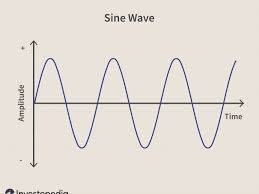

mathematically we can represent it like 

#### $ A*Sin(2*\pi*w*t) $

where 
- A is the amplitude
- w is the number of beats per second 
- and t is the time in seconds.

Let's generate Sine Waves!

In [1]:
import numpy as np
import math
import pandas as pd
from plotnine import *
from plotnine.animation import PlotnineAnimation
from IPython.display import HTML

In [2]:
def plotSinWave(wavefunction):
    f = [(i,wavefunction(i)) for i in np.linspace(0,4,500)]
    df = pd.DataFrame(f , columns=["t" , "y"])
    p = (
        ggplot(df , aes(x="t" , y="y" , group=1))
        + geom_line()
    )
    print(p)

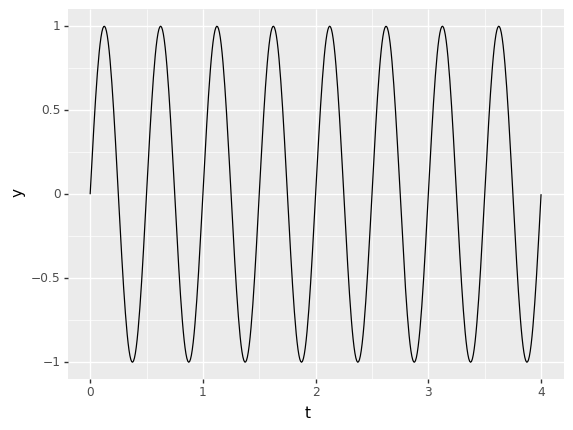

<ggplot: (133124999695)>


In [3]:
def wf(i):
    return math.sin(2*math.pi*2*i)
plotSinWave(wf)

That was easy. `math.sin(2*math.pi*2*i)` did the trick. Vary i and you get the wave.

Now suppose we have a wave that is formed by super imposing multiple sine waves

sin(a) + sin(b) + sin(c)...

the function *wf* below genertes one such super imposed wave, which is composed of 3 different sine waves. These individual waves have 2 , 5 and 7 beats per second respectively.

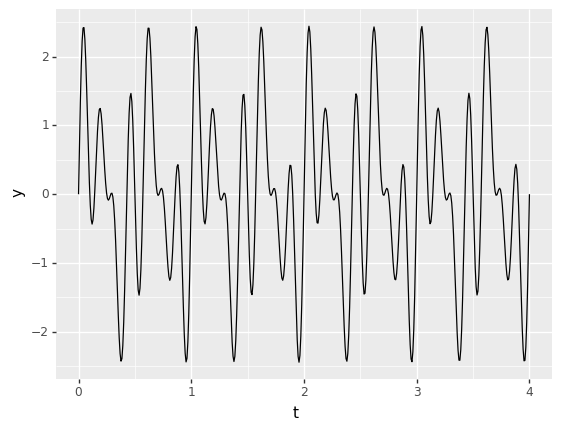

<ggplot: (133127276415)>


In [4]:
def wf(i):
    return math.sin(2*math.pi*2*i) + math.sin(2*math.pi*5*i) + math.sin(2*math.pi*7*i)
plotSinWave(wf)

This is where things start to get interesting.

#### now, what if we wanted to go other way around

Just by looking at the above image could you tell which all sine waves have been super imposed ?

#### kidding me ?

No! What if we wanted to figure out the 'base constituents' of this wave. What's it made of really?

Now this is where Fourier Transform comes into picture.
To 'break' the sine wave into its constituents. First step is to take the original wave and rotate it around a circle.

##### What are you talking about ? 

<img src="https://thumbs.gfycat.com/DevotedUnfitAcornwoodpecker-max-1mb.gif"></img>

The above visual is from [here](https://www.youtube.com/watch?v=spUNpyF58BY&t=218s&ab_channel=3Blue1Brown).

Basically what we are doing is transforming the sine wave from 1-D to 2-D. How ?

Imagine a pen that is pegged to a point with a variable length string. Now we decide to give the pen a spin around the point (origin)

In [5]:
def rotationAroundCircle(timePerRotation , varyLength=False):
    x = np.linspace(-1 , 1,1000)
    y = np.sqrt(1-x**2 )
    circledf = pd.DataFrame({"x" : x , "y"  :y})
    
    plots = []
    for i in np.linspace(0,10,100):
        A = 1
        if varyLength:
            A = np.random.random()
        rad = (i*2*math.pi/timePerRotation)
        p = (
            ggplot(circledf) 
            + geom_line(aes(x="x" , y="y" , group=1))
            + geom_line(aes(x="x" , y="-y" , group=1))
            + geom_rect(xmin=A*math.sin(rad) , ymin=A*math.cos(rad) , xmax=A*math.sin(rad)+0.1 , ymax=A*math.cos(rad) +0.1 , fill="green" )
        )
        plots.append(p)
    return plots

First let's lets keep the length of the string constant and focus only on the rotation around a fixed circle of radius 1. 
Suppose we choose to do 1 rotation per 5 seconds.

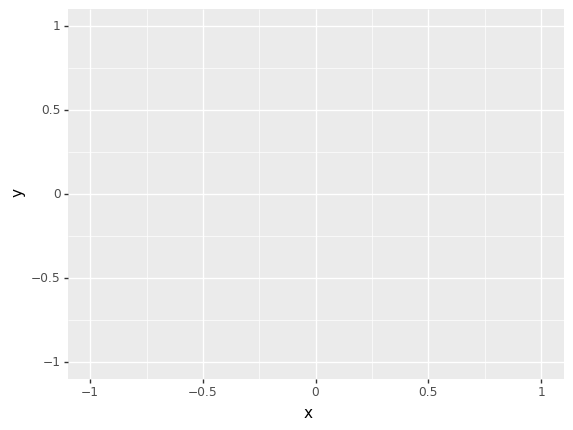

In [6]:
ani = PlotnineAnimation(rotationAroundCircle(5), interval=100, repeat_delay=500)
HTML(ani.to_jshtml())

#### Now let's randomly change the string length as the pen goes around the circle

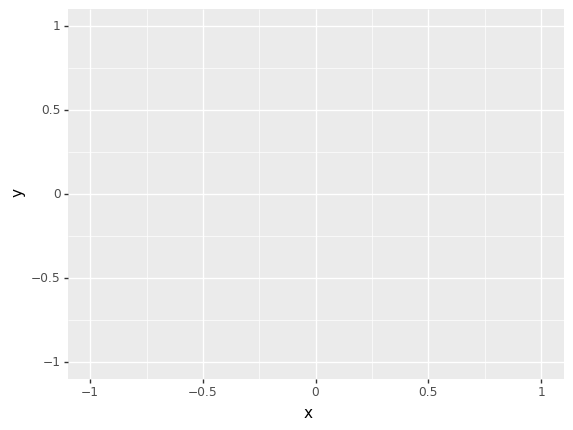

In [7]:
ani = PlotnineAnimation(rotationAroundCircle(5 , True), interval=100, repeat_delay=500)
HTML(ani.to_jshtml())


2 things we can change here
- Length of the string
- Speed of rotation of the pen


By changing these parameters we can draw differet patterns on the canvas. 

In the above plot we randomly changed the length of the string but we can get much more elegant looking and informative patterns if we change the length based on the information we have. What's that ? The amplitude of our sine wave at a point in time!

#### How do we go from 1-D to 2-D?

- We map the wave amplitude at a particular point in time to give us length of the string
- Speed of rotation can be thought of as a knob that we vary and observe the pattern being drawn


This gives us a way to convert a 1-D sine wave to a 2-D picture!

We change the distance of the pen from the origin based on the sine wave. Higher the amplitude would mean further the green box goes from the origin. As we progress along in time on the sine wave, our green box moves around the origin at different distances.

Let's take a look at that.

In the below charts you can control the time it takes to go around the circle by the *fft_freq* slider.
Also you can peek into a specific instance of time using the time slider.

Try keeping the fft_freq at 1 first and vary the time slider. You will see that the green dot moves in interesting patterns. Since Sine waves are symmetrical, the pattern generated is also symmetrical and begins to repeat as well.

The *red box* here is nothing but the center of mass. More on that later

In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [10]:
def plotWithTime( time , fft_freq ,wavefunction, limits=(-1,1)):
    interval= [0,10]
    fft = [(i,math.sin(2*math.pi*fft_freq*i)*wavefunction(i) , math.cos(2*math.pi*fft_freq*i)*wavefunction(i)) for i in np.linspace(interval[0],interval[1],500)]
    fftdf = pd.DataFrame(fft , columns=["t","x" , "y"])
    
    fftdf = fftdf[fftdf["t"] < time]
    
    p = (
        ggplot(fftdf , aes(x="x" , y="y"))
         + geom_point( aes(alpha="t") , fill="green" )
        + geom_rect(xmin=fftdf["x"].mean(), xmax=fftdf["x"].mean()+0.1 , ymin=fftdf["y"].mean() , ymax=fftdf["y"].mean()+.1 , fill="red")
         + scale_x_continuous(limits=limits)
        + scale_y_continuous(limits=limits)
        + ggtitle(f"Freq - {fft_freq} , Time - {time}")
    )
    print(p)

In [11]:
(
    interact(plotWithTime
             ,wavefunction=fixed(lambda i : math.sin(2*math.pi*2*i))
             ,limits=fixed((-1,1))
             , time=widgets.FloatSlider(min=0.1 , max=4 , step=0.1)
            , fft_freq=widgets.IntSlider(min=1 , max=5)
            )
)

interactive(children=(FloatSlider(value=0.1, description='time', max=4.0, min=0.1), IntSlider(value=1, descrip…

<function __main__.plotWithTime(time, fft_freq, wavefunction, limits=(-1, 1))>

### SO WHAT!

Go back above and now play with the fft_freq variable. 

Try keeping time at 4 and only change the fft_freq variable. 
Notice the final positions of the red box as you move the slider.

Do you notice anything ? 

The position of the red box is different when fft_freq = 2 compared to when fft_freq is anything else.

> **Why ? because 2 is the cycles/second of the original sine wave!!**

So basically when the red box moves far away from the origin, we know we have hit the right *fft_freq*! , we have hit the frequency of the original sine wave!

For a simple sine wave it might see insignificant. But imagine a wave composed of multiple sine waves superimposed on top of each other ? using this simple technique we can filter each component out!

In the example below we have a scenario where 2 sine waves have been super imposed. Play with the sliders and see what happens when fft_freq changes.

In [12]:
(
    interact(plotWithTime
             ,wavefunction=fixed(lambda i : math.sin(2*math.pi*2*i) + math.sin(2*math.pi*5*i) )
             ,limits=fixed([-2,2])
             , time=widgets.FloatSlider(min=0.1,max=7 , step=0.1)
            , fft_freq=widgets.IntSlider(min=1 , max=5)
            )
)

interactive(children=(FloatSlider(value=0.1, description='time', max=7.0, min=0.1), IntSlider(value=1, descrip…

<function __main__.plotWithTime(time, fft_freq, wavefunction, limits=(-1, 1))>

Able to figure out the frequencies of the original sine waves ? 2 and 5! perfect!